# Length dependency of conformational change

## Introduction

In this notebook, we set out to determine if there was a correlation between conformational change and the length of CDR loops or peptides.
We looked at both the correlation of bulk movements when loops where aligned on the framework regions and also the deformation effects when loops are aligned to one another.
All peptide conformations are measure from alignment on the antigen binding groove floor.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

## Loading data

## TCR Data

In [2]:
results_tcr_fw_align = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/rmsd_cdr_fw_align_results.csv')
results_tcr_fw_align['alignment'] = 'framework'

In [3]:
results_tcr_loop_align = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/rmsd_cdr_loop_align_results.csv')
results_tcr_loop_align['alignment'] = 'loop'

In [4]:
results_tcr = pd.concat([results_tcr_fw_align, results_tcr_loop_align])
results_tcr

,complex_id,structure_x_name,structure_y_name,chain_type,cdr,rmsd,alignment
0,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,1.932806,framework
1,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,2,1.308598,framework
2,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,3,1.244062,framework
3,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,beta_chain,1,0.809066,framework
4,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,beta_chain,2,0.688597,framework
...,...,...,...,...,...,...,...
809,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,alpha_chain,2,0.206414,loop
810,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,alpha_chain,3,0.459090,loop
811,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,1,0.255668,loop
812,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,2,0.175123,loop


## Peptide Data

In [5]:
results_peptide = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/pmhc_tcr_contact_apo_holo.csv')

results_peptide = results_peptide.query("chain_type == 'antigen_chain'")
results_peptide = results_peptide.drop(columns=['chain_type', 'tcr_contact'])

results_peptide

,complex_id,structure_x_name,structure_y_name,rmsd
2,5c0a_D-E-C-A-B_tcr_pmhc,5c0a_D-E-C-A-B_tcr_pmhc.pdb,5n1y_C-A-B_pmhc.pdb,0.448858
5,5wlg_D-E-C-A-B_tcr_pmhc,5wlg_D-E-C-A-B_tcr_pmhc.pdb,5wli_C-A-B_pmhc.pdb,0.498148
8,5wlg_D-E-C-A-B_tcr_pmhc,5wlg_D-E-C-A-B_tcr_pmhc.pdb,5wli_F-D-E_pmhc.pdb,0.519507
11,5wlg_D-E-C-A-B_tcr_pmhc,5wlg_D-E-C-A-B_tcr_pmhc.pdb,5wli_I-G-H_pmhc.pdb,0.459025
14,5wlg_D-E-C-A-B_tcr_pmhc,5wlg_D-E-C-A-B_tcr_pmhc.pdb,5wli_L-J-K_pmhc.pdb,0.494705
...,...,...,...,...
3301,7rtr_D-E-C-A-B_tcr_pmhc,7n6d_O-M-N_pmhc.pdb,7rtd_C-A-B_pmhc.pdb,0.486296
3304,7rtr_D-E-C-A-B_tcr_pmhc,7n6d_O-M-N_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,0.448905
3307,7rtr_D-E-C-A-B_tcr_pmhc,7p3d_C-A-B_pmhc.pdb,7rtd_C-A-B_pmhc.pdb,0.773692
3310,7rtr_D-E-C-A-B_tcr_pmhc,7p3d_C-A-B_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,0.765295


### Loading meta data

In [6]:
apo_holo_summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')

apo_holo_summary_df['id'] = apo_holo_summary_df['file_name'].str.replace('.pdb$', '', regex=True)

apo_holo_summary_df

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,id
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01,1ao7_D-E-C-A-B_tcr_pmhc
1,1b0g_C-A-B_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,C,A,B,NaN,ALWGFFPVL,hla_a_02_01,1b0g_C-A-B_pmhc
2,1b0g_F-D-E_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,F,D,E,NaN,ALWGFFPVL,hla_a_02_01,1b0g_F-D-E_pmhc
3,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01,1bd2_D-E-C-A-B_tcr_pmhc
4,1bii_P-A-B_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1bii_P-A-B_pmhc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,7rtd_C-A-B_pmhc.pdb,7rtd,pmhc,apo,NaN,NaN,C,A,B,NaN,YLQPRTFLL,hla_a_02_01,7rtd_C-A-B_pmhc
387,7rtr_D-E-C-A-B_tcr_pmhc.pdb,7rtr,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
388,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02,8gvb_A-B-P-H-L_tcr_pmhc
389,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02,8gvg_A-B-P-H-L_tcr_pmhc


In [7]:
cdr_types = ['CDR-A1', 'CDR-A2', 'CDR-A3','CDR-B1', 'CDR-B2', 'CDR-B3']
apo_holo_summary_df[cdr_types] = apo_holo_summary_df['cdr_sequences_collated'].str.split('-').apply(pd.Series)

In [8]:
apo_holo_summary_cdrs_df = apo_holo_summary_df.melt(
    id_vars=[col for col in apo_holo_summary_df.columns if col not in cdr_types],
    var_name='cdr_type',
    value_name='cdr_sequence',
    value_vars=cdr_types,
)

In [9]:
apo_holo_summary_cdrs_df[['chain_type', 'cdr']] = apo_holo_summary_cdrs_df['cdr_type'].map(
    lambda cdr_type: ('alpha_chain' if cdr_type[-2] == 'A' else 'beta_chain', int(cdr_type[-1]))
).apply(pd.Series)

In [10]:
apo_holo_summary_cdrs_df['cdr_length'] = apo_holo_summary_cdrs_df['cdr_sequence'].str.len()

In [11]:
apo_holo_summary_cdrs_df

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,id,cdr_type,cdr_sequence,chain_type,cdr,cdr_length
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01,1ao7_D-E-C-A-B_tcr_pmhc,CDR-A1,DRGSQS,alpha_chain,1,6.0
1,1b0g_C-A-B_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,C,A,B,NaN,ALWGFFPVL,hla_a_02_01,1b0g_C-A-B_pmhc,CDR-A1,NaN,alpha_chain,1,NaN
2,1b0g_F-D-E_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,F,D,E,NaN,ALWGFFPVL,hla_a_02_01,1b0g_F-D-E_pmhc,CDR-A1,NaN,alpha_chain,1,NaN
3,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01,1bd2_D-E-C-A-B_tcr_pmhc,CDR-A1,NSMFDY,alpha_chain,1,6.0
4,1bii_P-A-B_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1bii_P-A-B_pmhc,CDR-A1,NaN,alpha_chain,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,7rtd_C-A-B_pmhc.pdb,7rtd,pmhc,apo,NaN,NaN,C,A,B,NaN,YLQPRTFLL,hla_a_02_01,7rtd_C-A-B_pmhc,CDR-B3,NaN,beta_chain,3,NaN
2342,7rtr_D-E-C-A-B_tcr_pmhc.pdb,7rtr,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc,CDR-B3,ASSPDIEQY,beta_chain,3,9.0
2343,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02,8gvb_A-B-P-H-L_tcr_pmhc,CDR-B3,ASSDRDRVPETQY,beta_chain,3,13.0
2344,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02,8gvg_A-B-P-H-L_tcr_pmhc,CDR-B3,ASSDRDRVPETQY,beta_chain,3,13.0


In [12]:
apo_holo_summary_df['peptide_length'] = apo_holo_summary_df['peptide_sequence'].str.len()

### Merging data and metadata

### TCR

In [13]:
results_tcr = results_tcr.merge(
    apo_holo_summary_cdrs_df[['file_name', 'pdb_id', 'structure_type', 'state']],
    how='left',
    left_on='structure_x_name',
    right_on='file_name',
).merge(
    apo_holo_summary_cdrs_df[['file_name', 'pdb_id', 'structure_type', 'state']],
    how='left',
    left_on='structure_y_name',
    right_on='file_name',
).merge(
    apo_holo_summary_cdrs_df[['id',
                              'cdr_sequences_collated',
                              'peptide_sequence',
                              'mhc_slug',
                              'cdr_sequence',
                              'cdr_length',
                              'cdr_type',
                              'chain_type',
                              'cdr']],
    how='left',
    left_on=['complex_id', 'chain_type', 'cdr'],
    right_on=['id', 'chain_type', 'cdr'],
)

In [14]:
results_tcr['comparison'] = results_tcr['state_x'] + '-' + results_tcr['state_y']
results_tcr['comparison'] = results_tcr['comparison'].map(lambda entry: 'apo-holo' if entry == 'holo-apo' else entry)

In [15]:
results_tcr['structure_comparison'] = results_tcr.apply(
    lambda row: '-'.join(sorted([row.structure_x_name, row.structure_y_name])),
    axis='columns',
)
results_tcr = results_tcr.drop_duplicates(['structure_comparison', 'chain_type', 'cdr', 'alignment'])

In [16]:
results_tcr = results_tcr.groupby(['cdr_sequences_collated',
                                   'alignment',
                                   'comparison',
                                   'cdr_length',
                                   'cdr_sequence',
                                   'cdr_type',
                                   'chain_type',
                                   'cdr'])['rmsd'].mean().reset_index()

### Peptide

In [17]:
results_peptide = results_peptide.merge(
    apo_holo_summary_df[['file_name', 'pdb_id', 'state']],
    how='left',
    left_on='structure_x_name',
    right_on='file_name',
).merge(
    apo_holo_summary_df[['file_name', 'pdb_id', 'state']],
    how='left',
    left_on='structure_y_name',
    right_on='file_name',
).merge(
    apo_holo_summary_df[['id', 'peptide_sequence', 'peptide_length', 'mhc_slug']],
    how='left',
    left_on='complex_id',
    right_on='id',
)

In [18]:
results_peptide['comparison'] = results_peptide['state_x'] + '-' + results_peptide['state_y']
results_peptide['comparison'] = results_peptide['comparison'].map(
    lambda entry: 'apo-holo' if entry == 'holo-apo' else entry,
)

In [19]:
results_peptide['structure_comparison'] = results_peptide.apply(
    lambda row: '-'.join(sorted([row.structure_x_name, row.structure_y_name])),
    axis='columns',
)
results_peptide = results_peptide.drop_duplicates('structure_comparison')

In [20]:
results_peptide = results_peptide.groupby(['peptide_sequence',
                                           'comparison',
                                           'peptide_length',
                                           'mhc_slug'])['rmsd'].mean().reset_index()

In [21]:
results_peptide

,peptide_sequence,comparison,peptide_length,mhc_slug,rmsd
0,AAGIGILTV,apo-apo,9.0,hla_a_02_01,0.490830
1,AAGIGILTV,apo-holo,9.0,hla_a_02_01,1.025622
2,ALGIGILTV,apo-apo,9.0,hla_a_02_01,0.859868
3,ALGIGILTV,apo-holo,9.0,hla_a_02_01,1.274516
4,ALWGFFPVL,apo-apo,9.0,hla_a_02_01,0.164384
...,...,...,...,...,...
125,YGFRNVVHI,apo-holo,9.0,h2_db,0.275006
126,YLGGPDFPTI,apo-holo,10.0,hla_a_02_01,0.868938
127,YLQPRTFLL,apo-apo,9.0,hla_a_02_01,0.517401
128,YLQPRTFLL,apo-holo,9.0,hla_a_02_01,0.584577


## Visualising results

## TCR

### Alignment on Framework region

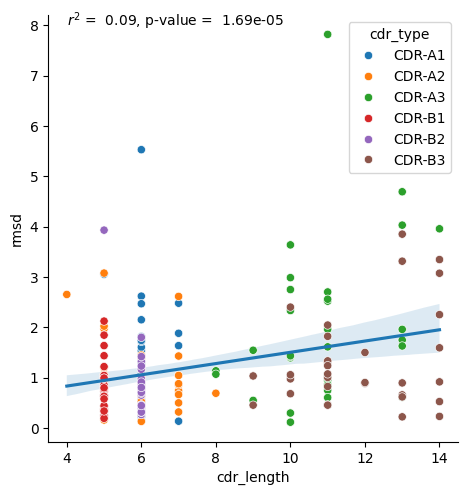

In [22]:
data = results_tcr.query("alignment == 'framework'")

r, p_val = scipy.stats.pearsonr(data['cdr_length'], data['rmsd'])

sns.lmplot(data.sort_values('cdr_type'), x='cdr_length', y='rmsd', scatter=False)
sns.scatterplot(data.sort_values('cdr_type'), x='cdr_length', y='rmsd', hue='cdr_type')

plt.text(4, 8, f'$r^2$ = {r**2: .2f}, p-value = {p_val: .2e}')

plt.show()

### Alignment on loops

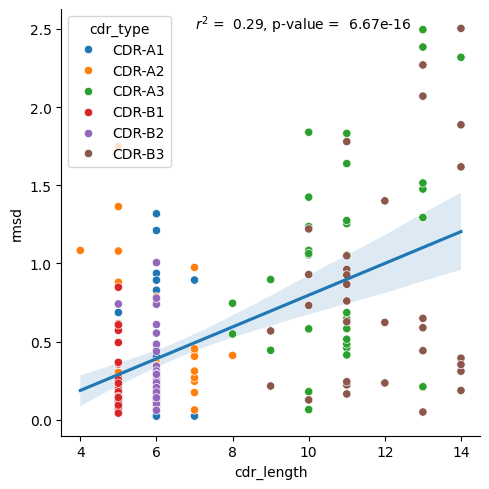

In [23]:
data = results_tcr.query("alignment == 'loop'")

r, p_val = scipy.stats.pearsonr(data['cdr_length'], data['rmsd'])

sns.lmplot(data.sort_values('cdr_type'), x='cdr_length', y='rmsd', scatter=False)
sns.scatterplot(data.sort_values('cdr_type'), x='cdr_length', y='rmsd', hue='cdr_type')

plt.text(7, 2.5, f'$r^2$ = {r**2: .2f}, p-value = {p_val: .2e}')

plt.show()

## Peptide

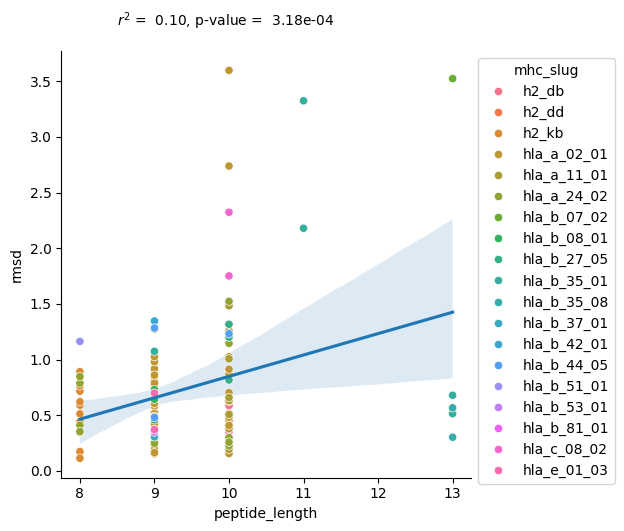

In [24]:
r, p_val = scipy.stats.pearsonr(results_peptide['peptide_length'], results_peptide['rmsd'])

sns.lmplot(results_peptide.sort_values('mhc_slug'), x='peptide_length', y='rmsd', scatter=False)
ax = sns.scatterplot(results_peptide.sort_values('mhc_slug'), x='peptide_length', y='rmsd', hue='mhc_slug')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.text(8.5, 4, f'$r^2$ = {r**2: .2f}, p-value = {p_val: .2e}')

plt.show()

## Conclusion

Both TCR CDR loops and peptides show a correlation between length and amount of conformational change.
For the TCRs, there is a correlation in both paradigms, framework alignment and loop alignment, but the correlation is much stronger looking at the loop alignments.
The increased correlation for loop alignments make sense since the conformational changes from the framework regions can be driven by other parts of the protein, but when the loops are aligned together, the only differences can be driven by changes in the loops themselves, implying the loop length has more of an effect.